# Employee Attrition Analysis and Prediction

## Project Overview
This project aims to provide insights into the factors influencing employee attrition and predict which employees are likely to leave the company.

---

## Problem Statement
Acme Corporation, a leading tech company, is facing a significant challenge with employee turnover. The HR department is concerned about the increasing rate of attrition, as it negatively impacts team dynamics, project continuity, and overall company morale. To address this issue, Acme Corporation wants to leverage data analytics and machine learning to understand the factors influencing employee turnover and predict which employees are likely to leave in the near future.

---
## Definition of Attrition
**Attrition** refers to the gradual reduction in the workforce due to employees leaving the company voluntarily, typically through resignation or retirement, without being replaced immediately. It reflects the natural turnover in an organization.

---
## Difference Between Attrition and Layoff
While **attrition** happens voluntarily when employees choose to leave the company, **layoff** refers to the involuntary termination of employees by the employer, often due to financial constraints, restructuring, or other business-related reasons. In attrition, the position may remain unfilled, whereas in a layoff, the employer actively decides to downsize the workforce.

---
Now, let's start the work of **Data Preprocessing and Cleaning.**

# Data Preprocessing and Cleaning

## Loading the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


In [2]:
#Loading the dataset
original_df = pd.read_csv(r"C:\Users\afiroz\PycharmProjects\pythonProject1\My_projects\Data Analysis and internships\TechnoColabs Internship\Technocolabs-Attrition-Analysis-and-Turnover-Prediction\Attrition Dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv"
                         ,encoding='UTF-8-SIG')


In [3]:
# Creating a Copy of the df
cleaned_df = original_df.copy()

## Statistical measure of the data

In [4]:
# Seeing the first 5 columns
cleaned_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
# Seeing the last 5 columns
cleaned_df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [6]:
# Finding out the Shape of the df
cleaned_df.shape

(1470, 35)

In [7]:
# Showing the columns
cleaned_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
# Summary Stats
cleaned_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Data Cleaning

In [9]:
# Checking for Null Values
missing_values = cleaned_df.isnull().sum()
missing_values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Upon examining the dataset for missing or null values, we found that all the columns are complete, meaning there are no empty or missing entries in any of the records. 

In [10]:
# Checking for duplicated Values
duplicates = cleaned_df.duplicated().sum()
duplicates

0

#### Upon examining the dataset for duplicate, we found that all the columns are no duplicate values.

In [11]:
# Checking for data type inconsistencies
data_types = cleaned_df.dtypes
data_types

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [12]:
# Function to detect outliers using the IQR method
def detect_outliers(df, columns):
    # Initialize an empty dictionary to store the number of outliers for each column
    outliers_summary = {}
    
    # Loop through each specified column in the DataFrame
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers: values outside the lower and upper bounds
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        # Store the number of outliers for the column in the outliers_summary dictionary
        outliers_summary[column] = len(outliers)
    # Return the dictionary summarizing the number of outliers in each column
    return outliers_summary


In [13]:
# diiferentiating the numerical columns
numerical_col = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
#calling the function
outliers_summary = detect_outliers(cleaned_df, numerical_col)

outliers_summary

{'Age': 0,
 'DailyRate': 0,
 'DistanceFromHome': 0,
 'Education': 0,
 'EmployeeCount': 0,
 'EmployeeNumber': 0,
 'EnvironmentSatisfaction': 0,
 'HourlyRate': 0,
 'JobInvolvement': 0,
 'JobLevel': 0,
 'JobSatisfaction': 0,
 'MonthlyIncome': 114,
 'MonthlyRate': 0,
 'NumCompaniesWorked': 52,
 'PercentSalaryHike': 0,
 'PerformanceRating': 226,
 'RelationshipSatisfaction': 0,
 'StandardHours': 0,
 'StockOptionLevel': 85,
 'TotalWorkingYears': 63,
 'TrainingTimesLastYear': 238,
 'WorkLifeBalance': 0,
 'YearsAtCompany': 104,
 'YearsInCurrentRole': 21,
 'YearsSinceLastPromotion': 107,
 'YearsWithCurrManager': 14}

C:\Users\afiroz\AppData\Local\Temp\ipykernel_23192\3214474225.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\afiroz\AppData\Local\Temp\ipykernel_23192\3214474225.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\afiroz\AppData\Local\Temp\ipykernel_23192\3214474225.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\afiroz\AppData\Local\Temp\ipykernel_23192\3214474225.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\afiroz\AppData\Local\Temp\ipykernel_23192\3214474225.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\afiroz\AppData\Local\Temp\ipykernel_23192\3214474225.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\afiroz\AppData\Local\Temp\ipykernel_23192\3214474225.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Use

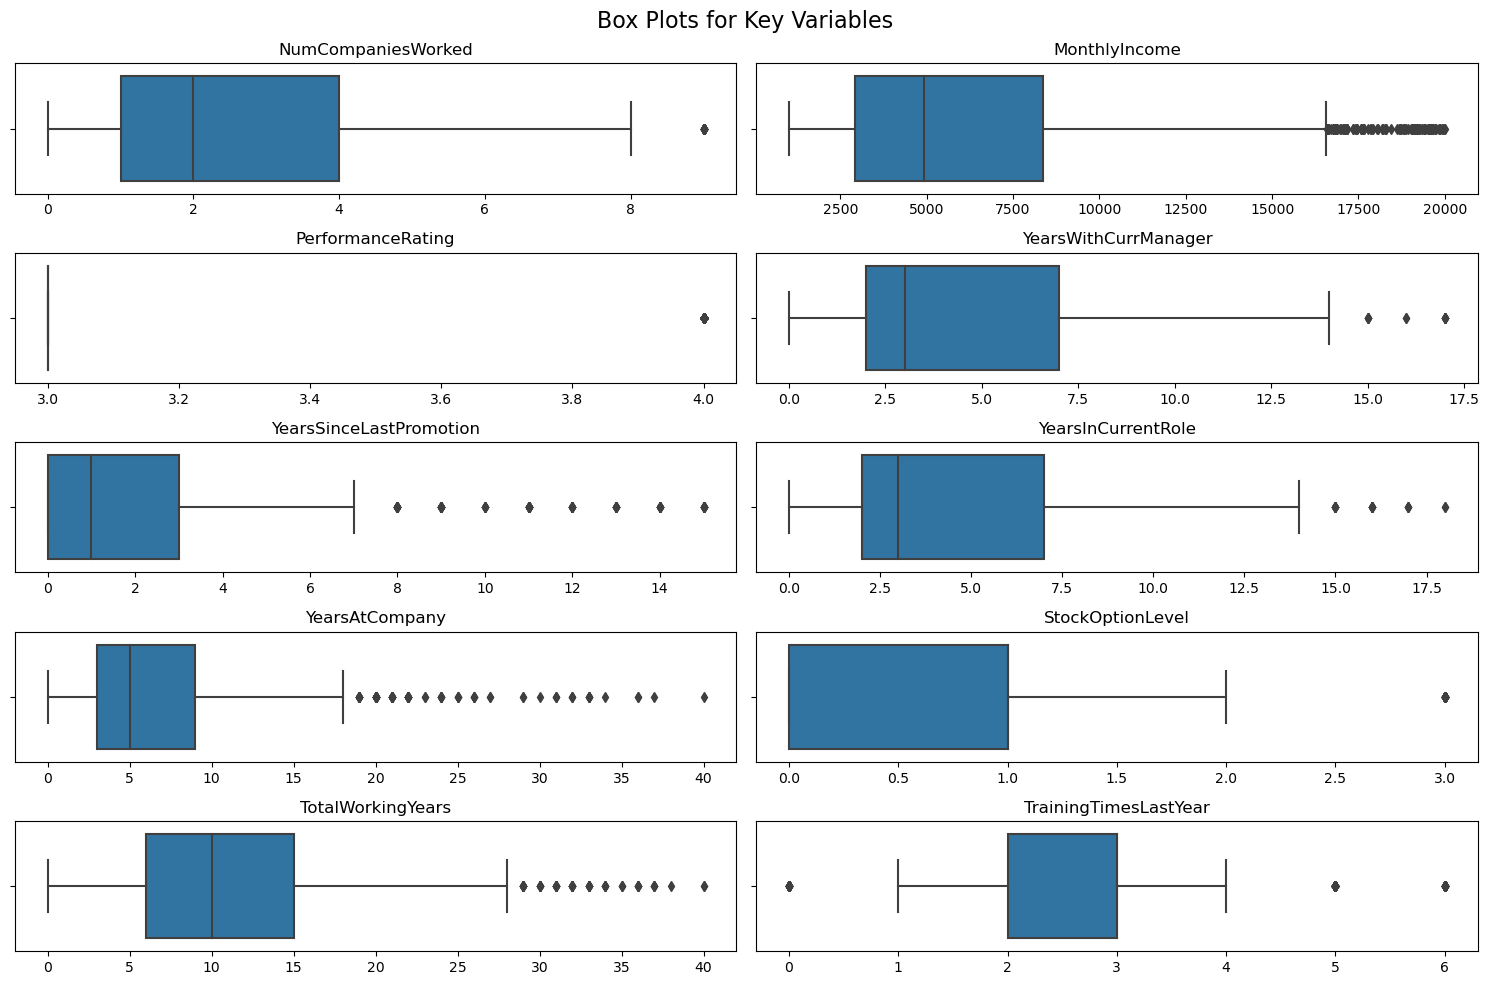

In [14]:
# Visualizing outliers
columns_to_plot = ['NumCompaniesWorked', 'MonthlyIncome', 'PerformanceRating','YearsWithCurrManager',
                  'YearsSinceLastPromotion','YearsInCurrentRole','YearsAtCompany','StockOptionLevel','TotalWorkingYears',
                   'TrainingTimesLastYear']
# Set up the figure and axes for multiple box plots
fig, axes = plt.subplots(5, 2, figsize=(15, 10))

# Add a title to the entire figure
fig.suptitle('Box Plots for Key Variables', fontsize=16)

# Loop through the columns and create individual box plots
for i, column in enumerate(columns_to_plot):
    # Determine the row and column in the subplot grid
    row, col = divmod(i, 2)
    # Create a boxplot for each column
    sns.boxplot(x=cleaned_df[column], ax=axes[row, col])
    # Set the title for each subplot
    axes[row, col].set_title(column)
    # Remove the x-axis label for clarity
    axes[row, col].set_xlabel('')

    plt.tight_layout()
plt.show()


In [15]:
# Selecting the columns with categorical data
categorical_columns = cleaned_df.select_dtypes(include=['object']).columns

# Create a dictionary that stores the number of unique values for each categorical column
num_unique_values = {col: cleaned_df[col].nunique() for col in categorical_columns}
num_unique_values


{'Attrition': 2,
 'BusinessTravel': 3,
 'Department': 3,
 'EducationField': 6,
 'Gender': 2,
 'JobRole': 9,
 'MaritalStatus': 3,
 'Over18': 1,
 'OverTime': 2}

In [16]:
# Create a dictionary that stores the unique values for each categorical column
unique_values= {col: cleaned_df[col].unique().tolist() for col in categorical_columns}
unique_values

{'Attrition': ['Yes', 'No'],
 'BusinessTravel': ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'],
 'Department': ['Sales', 'Research & Development', 'Human Resources'],
 'EducationField': ['Life Sciences',
  'Other',
  'Medical',
  'Marketing',
  'Technical Degree',
  'Human Resources'],
 'Gender': ['Female', 'Male'],
 'JobRole': ['Sales Executive',
  'Research Scientist',
  'Laboratory Technician',
  'Manufacturing Director',
  'Healthcare Representative',
  'Manager',
  'Sales Representative',
  'Research Director',
  'Human Resources'],
 'MaritalStatus': ['Single', 'Married', 'Divorced'],
 'Over18': ['Y'],
 'OverTime': ['Yes', 'No']}

In [17]:
# Downloading the data in Excel
cleaned_df.to_excel(r"C:/Users/afiroz/PycharmProjects/pythonProject1/My_projects/Data Analysis and internships/TechnoColabs Internship/Technocolabs-Attrition-Analysis-and-Turnover-Prediction/cleaned_df_excel.xlsx", index=True)
# Downloading the data in CSV
cleaned_df.to_csv(r"C:/Users/afiroz/PycharmProjects/pythonProject1/My_projects/Data Analysis and internships/TechnoColabs Internship/Technocolabs-Attrition-Analysis-and-Turnover-Prediction/cleaned_df_csv.csv", index=True)

## At the end:

- The dataset is organized with no missing values. There are no duplicates, ensuring that the data is clean and ready for further analysis.

- The dataset primarily consists of numerical data (integer and float types), which is ideal for analytical tasks. A few columns are categorical (object data type), and there is no data type inconsistency.

- The dataset is imbalanced. The "No" class of attrition (our target variable) accounts for approximately 83.88% of the data, while the "Yes" class of attrition (our taregt variable) represents about 16.12%.

- The categorical columns contain unique values and can be encoded (using techniques like one-hot or label encoding) for improved performance and memory optimization, particularly for machine learning models and dashboards.

- The outliers in the dataset are valid observations, representing significant data points (e.g., long-tenured employees or high earners). These outliers influence key factors, so it is better to retain them for analysis and dashboard building.

- These outliers will be useful for building comprehensive dashboards in Power BI, allowing for detailed insights into important employee segments.


## Data Exploration

In [18]:
# Distribution of Education Field in the Dataset
cleaned_df['EducationField'].value_counts(normalize=True)*100

EducationField
Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources      1.836735
Name: proportion, dtype: float64

In [19]:
# Distribution of Attrition in the Dataset
cleaned_df['Attrition'].value_counts(normalize=True)*100

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

In [20]:
# Top 10 monthly salaries
cleaned_df['MonthlyIncome'].sort_values(ascending=False).head(10)

190     19999
746     19973
851     19943
165     19926
568     19859
918     19847
749     19845
1242    19833
898     19740
956     19717
Name: MonthlyIncome, dtype: int64

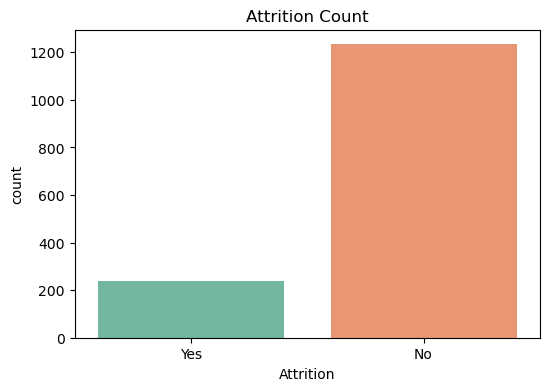

In [21]:
# 1. Distribution of 'Attrition' (target variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=cleaned_df, palette='Set2')
plt.title('Attrition Count')
plt.show()

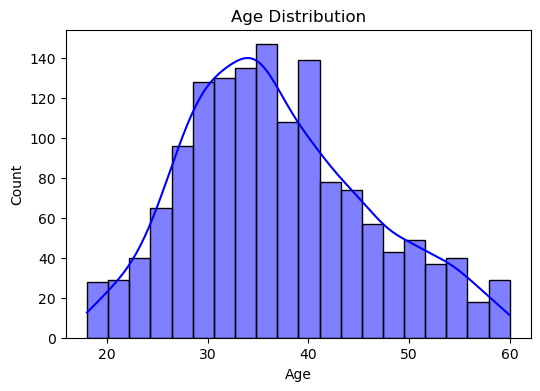

In [22]:
# 2. Distribution of 'Age'
plt.figure(figsize=(6, 4))
sns.histplot(cleaned_df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

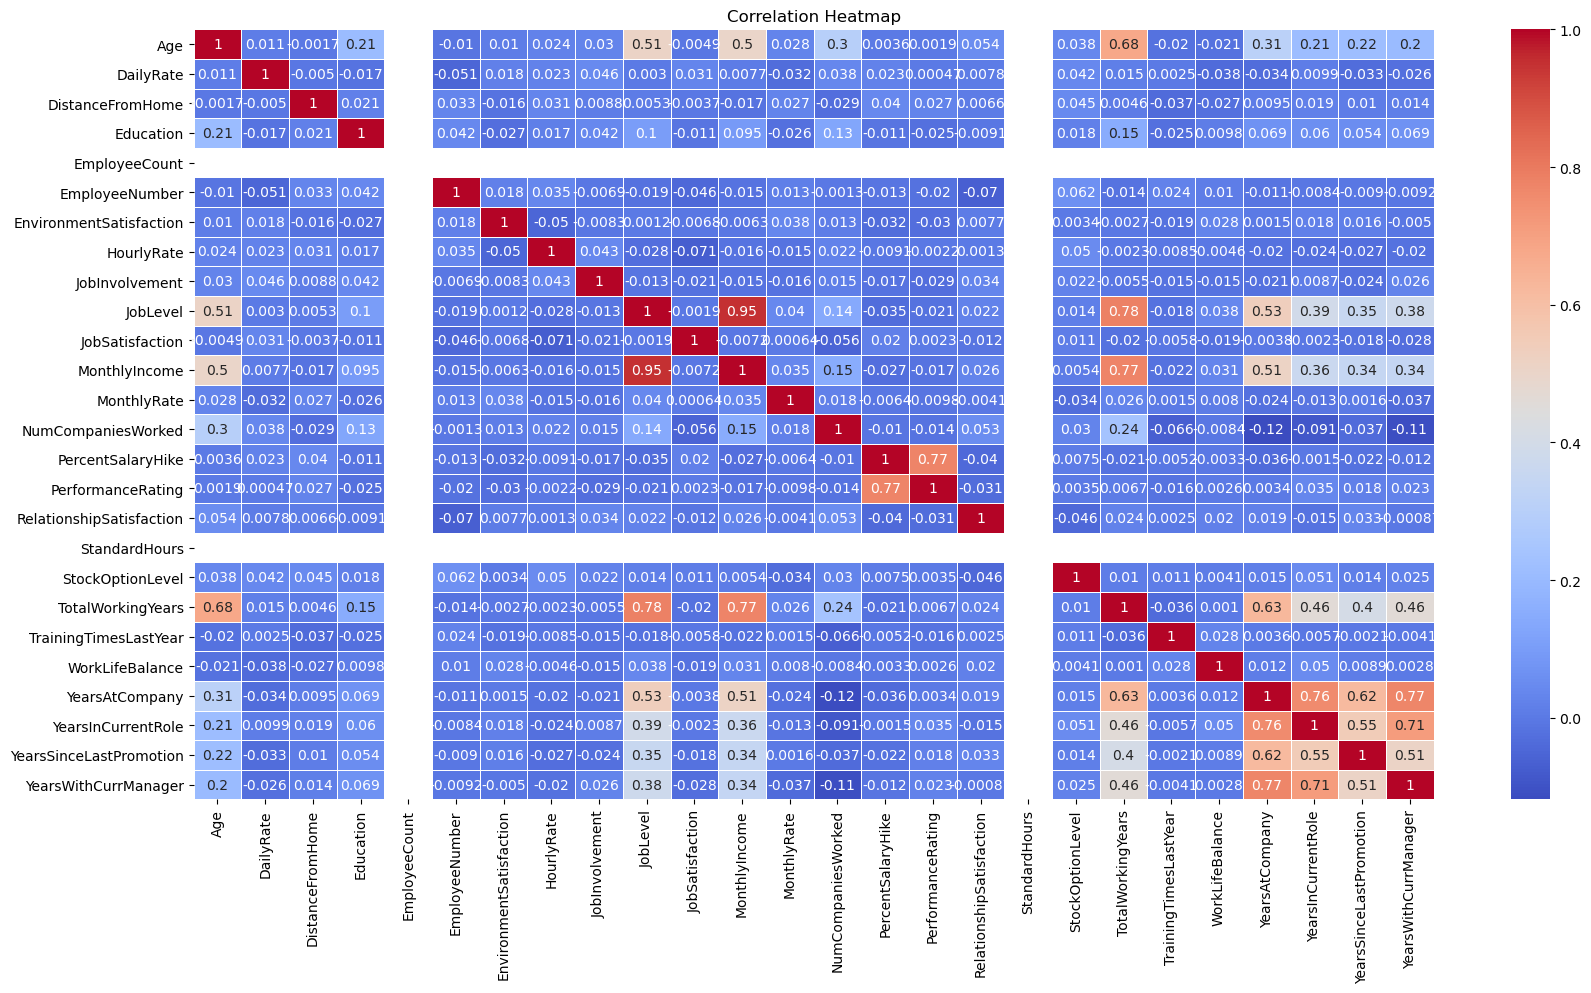

In [23]:
# 3. Correlation analysis in numerical columns

# Select only the numerical columns
numerical_df = cleaned_df.select_dtypes(include=['float64', 'int64'])

# Now create the correlation matrix and plot the heatmap
plt.figure(figsize=(20, 10))
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Insights from the Heatmap
---

#### Correlation is a statistical measure that describes the strength and direction of a relationship between two variables.

### Correlation Values: These are the numbers inside each cell, ranging from -1 to 1.
1 indicates a perfect positive correlation.
-1 indicates a perfect negative correlation.
0 indicates no correlation between the variables.

---
### Color Scale:

Dark red represents a strong positive correlation.
Dark blue represents a strong negative correlation.
Light blue or white indicates little to no correlation.

---
### What You Can Observe:

---

#### Strong Positive Correlations (Red):

TotalWorkingYears and JobLevel have a high correlation of 0.78, which suggests that as employees spend more years working, they tend to reach higher job levels.

TotalWorkingYears is also highly correlated with MonthlyIncome (0.77) and YearsAtCompany (0.76), implying that employees with more total working years are more likely to have higher incomes and stay at the company longer.

---
#### Strong Negative Correlations (Blue):

JobLevel and DistanceFromHome show a slight negative correlation of around -0.03, indicating that job level and distance from home have a weak inverse relationship.his weak negative correlation suggests that higher-level employees are neither more likely nor less likely to live closer or farther from work.The relationship between job level and distance from home is very weak and can be considered negligible in terms of impact.

TotalWorkingYears and Age (-0.68) show a strong negative correlation.This strong negative correlation suggests that older employees tend to have fewer total working years, which could imply that older employees in this dataset may have started their careers later or experienced career breaks or job changes.

---
#### Interesting Observations:

YearsSinceLastPromotion has a moderate positive correlation with YearsInCurrentRole (0.55), indicating that people who have been in the same role for a long time may also not have received a recent promotion.

JobInvolvement and other variables show very little correlation with most other factors, indicating that it might not be strongly related to other measurable aspects of the dataset.

---
#### Close to Zero Correlation:

Variables such as HourlyRate and DistanceFromHome show close to zero correlation with many other factors, indicating they do not strongly influence or are influenced by those variables.

---

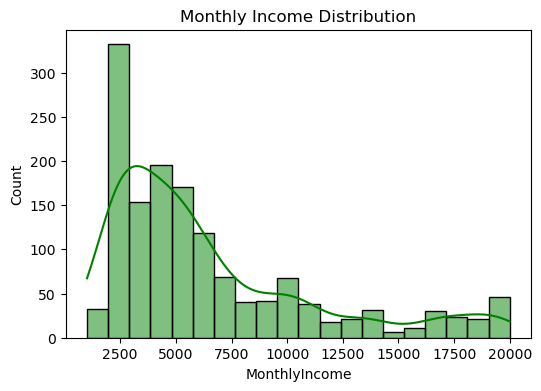

In [24]:
# 4 Distribution on Monthly Income
plt.figure(figsize=(6, 4))
sns.histplot(cleaned_df['MonthlyIncome'], bins=20, kde=True, color='green')
plt.title('Monthly Income Distribution')
plt.show()


## Conclusion of Data Exploration:

### 1. Attrition Count
- **Description**: This bar chart shows the distribution of employee attrition. The majority of employees have not left the company (`Attrition = No`), while a smaller portion has (`Attrition = Yes`).
- **Conclusion**: Employee attrition is relatively low in this dataset, with the majority of employees staying with the company.

---

### 2. Age Distribution
- **Description**: The histogram represents the distribution of employee ages. The distribution is slightly skewed to the right, with the majority of employees between the ages of 30 and 40.
- **Conclusion**: Most employees are in their 30s and 40s, with a declining number of employees in older age groups.

---
### 3. Correlation Heatmap
- **Description**: The heatmap displays the correlation between numerical features in the dataset. Strong positive correlations are shown in red, and strong negative correlations in blue. For example, `TotalWorkingYears` and `JobLevel` have a high positive correlation.
- **Conclusion**: Strong correlations exist between factors like `TotalWorkingYears`, `JobLevel`, and `MonthlyIncome`, which are indicators of career progression and seniority. Most other variables have weak correlations.

---
### 4. Monthly Income Distribution
- **Description**: This histogram shows the distribution of monthly income across employees. Most employees earn between 2000 dollars and around 5500 dollars per month, with fewer employees earning more than 10,000 dollars.
- **Conclusion**: The dataset has a high concentration of lower-income employees, with only a small number of high-income earners



---







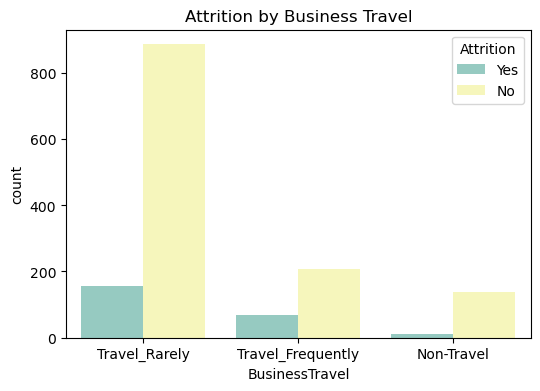

In [25]:
# Attrition based on 'BusinessTravel'
plt.figure(figsize=(6, 4))
sns.countplot(x='BusinessTravel', hue='Attrition', data=cleaned_df, palette='Set3')
plt.title('Attrition by Business Travel')
plt.show()

In [26]:
# Counting the occurences of Attrition based on Business Travel

attrition_by_travel = cleaned_df.groupby(['BusinessTravel', 'Attrition']).size().unstack()
attrition_by_travel


Attrition,No,Yes
BusinessTravel,,
Non-Travel,138,12
Travel_Frequently,208,69
Travel_Rarely,887,156


In [27]:
# Calculate the percentage of attrition based on Business Travel

attrition_by_travel_percentage = attrition_by_travel.div(attrition_by_travel.sum(axis=1), axis=0) * 100
attrition_by_travel_percentage


Attrition,No,Yes
BusinessTravel,,
Non-Travel,92.000000,8.000000
Travel_Frequently,75.090253,24.909747
Travel_Rarely,85.043145,14.956855


In [28]:
# Calculate the overall percentage of attrition based on Business Travel

overall_attrition_by_travel = (attrition_by_travel / attrition_by_travel.sum().sum()) * 100
overall_attrition_by_travel


Attrition,No,Yes
BusinessTravel,,
Non-Travel,9.387755,0.816327
Travel_Frequently,14.149660,4.693878
Travel_Rarely,60.340136,10.612245


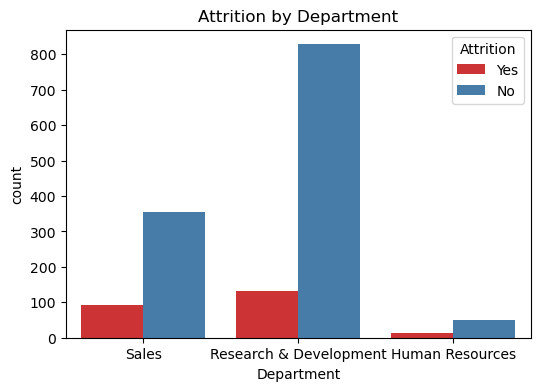

In [29]:
#  Attrition based on 'Department'
plt.figure(figsize=(6, 4))
sns.countplot(x='Department', hue='Attrition', data=cleaned_df, palette='Set1')
plt.title('Attrition by Department')
plt.show()

In [30]:
# Calculate the attrition based on Department

attrition_by_dept = cleaned_df.groupby(['Department', 'Attrition']).size().unstack()
attrition_by_dept


Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


In [31]:
# Calculate the percentage of attrition based on Department

attrition_by_dept_percentage = attrition_by_dept.div(attrition_by_dept.sum(axis=1), axis=0) * 100
attrition_by_dept_percentage


Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


In [32]:
# Calculate the overall percentage of attrition based on department

overall_attrition_by_dept = (attrition_by_dept / attrition_by_dept.sum().sum()) * 100
overall_attrition_by_dept

Attrition,No,Yes
Department,,
Human Resources,3.469388,0.816327
Research & Development,56.326531,9.047619
Sales,24.081633,6.258503


##### Frequent business travelers and employees in the Sales department have higher attrition rates, with 24.91% and 20.63% leaving, respectively. In contrast, rare traveling employees and those in Research & Development show lower attrition rates but contribute more to overall retention. **Rare travelers** and **Research & Development** account for the largest portions of total attrition, contributing **10.61%** and **9.05%**, respectively.


## Data Encoding

**Power BI can handle categorical values directly, so encoding the data is not strictly necessary. However, I performed this data preprocessing step to enhance my skills and deepen my understanding of data analysis using Python.**

In [33]:
encoded_df = cleaned_df.copy()

In [34]:
# Binary encoding for 'Attrition'
encoded_df['Attrition'] = encoded_df['Attrition'].map({'Yes': 1, 'No': 0})

# Identify categorical columns that need One-Hot Encoding
categorical_columns = cleaned_df.select_dtypes(include=['object']).columns


In [35]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(encoded_df, columns=categorical_columns)

In [36]:
# Show the first few rows of the transformed data
df_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_0,Attrition_1,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,True,False
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False


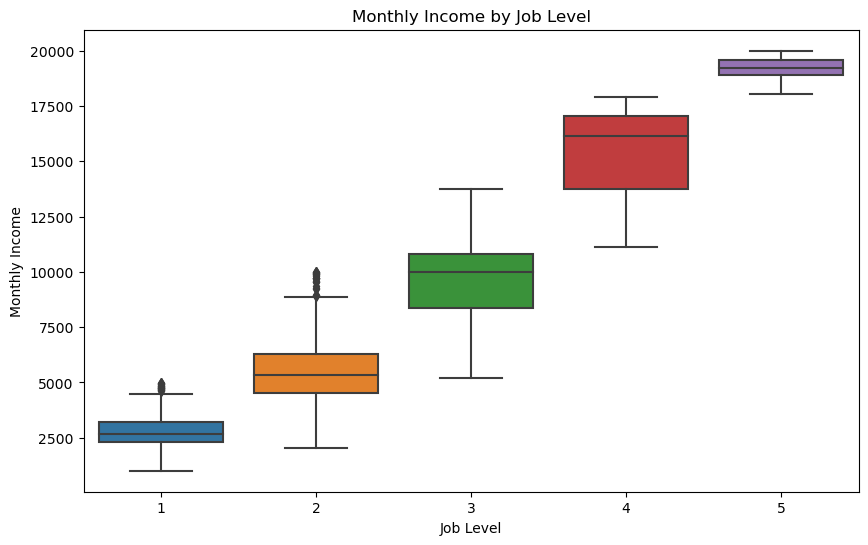

In [37]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=df_encoded)
plt.title('Monthly Income by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')
plt.show()


### Insights from the graph
1. **Monthly Income Rises with Job Level**: As job level increases, median monthly income also rises significantly.
2. **Income Variability**: Job levels 2 and 3 show higher income variability, indicating a wider range of incomes within these levels.


In [38]:
# Downloading the Encoded Df in excel
df_encoded.to_excel(r"C:/Users/afiroz/PycharmProjects/pythonProject1/My_projects/Data Analysis and internships/TechnoColabs Internship/Technocolabs-Attrition-Analysis-and-Turnover-Prediction/encoded_df_excel.xlsx", index=True)
# Downloading the data in CSV
df_encoded.to_csv(r"C:/Users/afiroz/PycharmProjects/pythonProject1/My_projects/Data Analysis and internships/TechnoColabs Internship/Technocolabs-Attrition-Analysis-and-Turnover-Prediction/encoded_df_csv.csv", index=True)

---                                       